In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
from tensorflow.keras import regularizers

from tensorflow.keras import layers
from tensorflow.keras import losses

from collections import Counter


import pandas as pd
import numpy as np

import sklearn


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


import seaborn as sns

import pydot

In [2]:
import pandas as pd
reviews=pd.read_csv('C:/Users/vishe/OneDrive/Desktop/Mini_project_final_review/review_clean_countvectorize.csv')

In [3]:
reviews_train=reviews[:35000]
test_data=reviews[35000:]
reviews_train

,clean_review,emotion
0,change look iphone barely protects it. one dro...,neg
1,fits like glove. packaged great.,pos
2,screen protector arrived within week. fits pho...,pos
3,"bought ""blinged"" version case, want ruin work,...",pos
4,"think phone good. blu studio energy upgrading,...",neg
...,...,...
34995,product excellent. went ease protects well. re...,pos
34996,good case device. recommend buying one discont...,pos
34997,worked brilliantly month stopped working sudde...,pos
34998,finally easier way put screen protector on.,pos


In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(reviews_train['clean_review'].tolist(),\
                                                      reviews_train['emotion'].tolist(),\
                                                      test_size=0.5,\
                                                      stratify = reviews_train['emotion'].tolist(),\
                                                      random_state=0)


print('Train data len:'+str(len(X_train)))
print('Class distribution'+str(Counter(y_train)))
print('Valid data len:'+str(len(X_valid)))
print('Class distribution'+ str(Counter(y_valid)))

Train data len:17500
Class distributionCounter({'pos': 13324, 'neg': 4176})
Valid data len:17500
Class distributionCounter({'pos': 13323, 'neg': 4177})


In [5]:


num_words = 50000

tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(X_train)


print(str(tokenizer.texts_to_sequences(['xyz how are you'])))



[[1, 4855, 1432, 343]]


In [6]:

from sklearn.preprocessing import LabelEncoder as le

x_train = np.array( tokenizer.texts_to_sequences(X_train) )
x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )
x_test  = np.array( tokenizer.texts_to_sequences(test_data['clean_review'].tolist()) )

sequence_length=50

x_train = pad_sequences(x_train, padding='post', maxlen=sequence_length)
x_valid = pad_sequences(x_valid, padding='post', maxlen=sequence_length)
x_test = pad_sequences(x_test, padding='post', maxlen=sequence_length)

le = LabelEncoder()

train_labels =  np.asarray(le.fit_transform(y_train))
#train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))
valid_labels = np.asarray(le.fit_transform(y_valid))
#valid_labels = np.asarray( tf.keras.utils.to_categorical(valid_labels))

test_labels = np.asarray(test_data['emotion'].tolist())
test_labels = np.asarray(le.fit_transform(test_labels))

print('Train data len:'+str(len(x_train)))
print('Class distribution'+str(Counter(train_labels)))

print('Validation data len:'+str(len(x_valid)))
print('Class distribution'+str(Counter(valid_labels)))

print('Test data len:'+str(len(x_test)))
print('Class distribution'+str(Counter(test_labels)))


train_ds = tf.data.Dataset.from_tensor_slices((x_train,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid,valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,test_labels))
train_labels

C:\Users\vishe\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\vishe\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.
C:\Users\vishe\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-

Train data len:17500
Class distributionCounter({1: 13324, 0: 4176})
Validation data len:17500
Class distributionCounter({1: 13323, 0: 4177})
Test data len:5000
Class distributionCounter({1: 3724, 0: 1276})


array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [8]:
count =0
print('======Train dataset ====')
for value,label in train_ds:
    count += 1
    print(value,label)
    if count==1:
        break
count =0
print('======Validation dataset ====')
for value,label in valid_ds:
    count += 1
    print(value,label)
    if count==1:
        break
count =0
print('======Test dataset ====')
for value,label in test_ds:
    count += 1
    print(value,label)
    if count==1:
        break

======Train dataset ====
tf.Tensor(
[  70   12   90 1056 1075 1990  730 2971  279 2612  233  421   87  277
 1091   70  253  205 6820  148   42  216 1169  244  907  583  385 1057
  289 1076  205  244 1233   69   80 6821  279 1870 2971  202  320  180
  593  706 1368    0    0    0    0    0], shape=(50,), dtype=int32) tf.Tensor(0, shape=(), dtype=int64)
======Validation dataset ====
tf.Tensor(
[  12   19   27   19   91  182   12  139  352   44 3162   19   91  410
  921   27   11    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0], shape=(50,), dtype=int32) tf.Tensor(1, shape=(), dtype=int64)
======Test dataset ====
tf.Tensor(
[1071    2  508   66  257  136  145    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    

In [9]:
max_features =50000
embedding_dim =16
sequence_length = 50

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length,\
                                    embeddings_regularizer = regularizers.l2(0.005))) 
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.LSTM(embedding_dim,dropout=0.2, recurrent_dropout=0.2,return_sequences=True,\
                                                             kernel_regularizer=regularizers.l2(0.005),\
                                                             bias_regularizer=regularizers.l2(0.005)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(8, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))


model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
                               



model.summary()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(1e-3),metrics=[tf.keras.metrics.BinaryAccuracy()])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            800016    
_________________________________________________________________
dropout (Dropout)            (None, 50, 16)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 50, 16)            2112      
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               410112    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 4

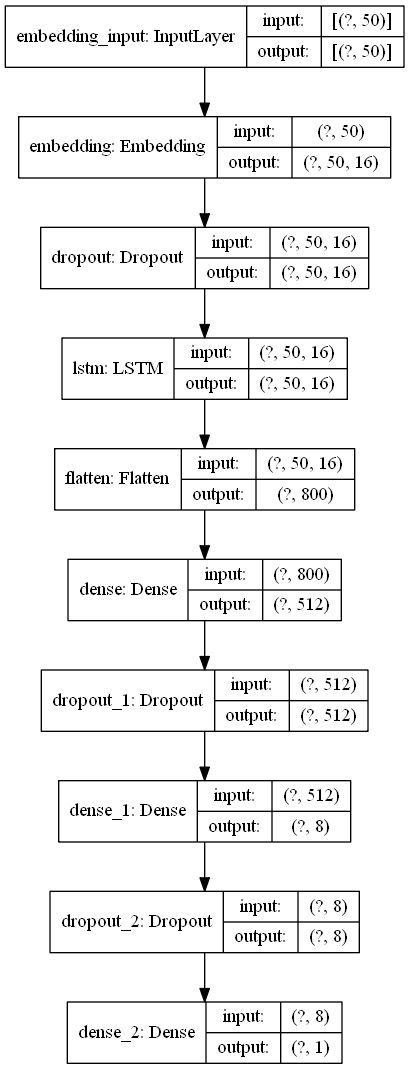

In [10]:
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [11]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    epochs = 15
    print(model.fit(train_ds.batch(1000),epochs= epochs ,validation_data=valid_ds.batch(1000),verbose=1))

Train for 18 steps, validate for 18 steps
Epoch 1/15


C:\Users\vishe\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\vishe\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


18/18 [==============================] - 15s 812ms/step - loss: 3.2947 - binary_accuracy: 0.7534 - val_loss: 1.9976 - val_binary_accuracy: 0.7613
Epoch 2/15
18/18 [==============================] - 4s 198ms/step - loss: 1.4525 - binary_accuracy: 0.7614 - val_loss: 1.0177 - val_binary_accuracy: 0.7613
Epoch 3/15
18/18 [==============================] - 5s 268ms/step - loss: 0.8809 - binary_accuracy: 0.7614 - val_loss: 0.7529 - val_binary_accuracy: 0.7613
Epoch 4/15
18/18 [==============================] - 5s 252ms/step - loss: 0.7026 - binary_accuracy: 0.7614 - val_loss: 0.6137 - val_binary_accuracy: 0.7613
Epoch 5/15
18/18 [==============================] - 5s 254ms/step - loss: 0.6100 - binary_accuracy: 0.7698 - val_loss: 0.5668 - val_binary_accuracy: 0.7910
Epoch 6/15
18/18 [==============================] - 4s 222ms/step - loss: 0.5648 - binary_accuracy: 0.8102 - val_loss: 0.5458 - val_binary_accuracy: 0.8349
Epoch 7/15
18/18 [==============================] - 4s 206ms/step - loss: 

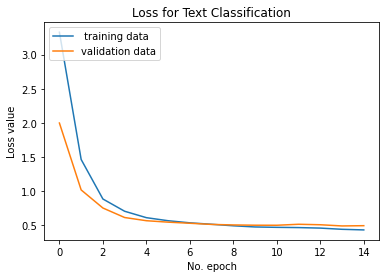

In [12]:
plt.plot(model.history .history['loss'], label=' training data')
plt.plot(model.history .history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

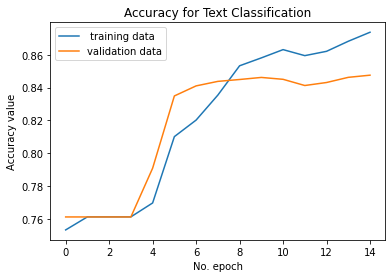

In [13]:
plt.plot(model.history.history['binary_accuracy'], label=' training data')
plt.plot(model.history.history['val_binary_accuracy'], label='validation data')
plt.title('Accuracy for Text Classification')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [14]:
import json
model.save('C:\\Users\\vishe\\OneDrive\\Desktop\\Mini_project_final_review\\lstm_out\\tf_lstmmodel.h5') 
json_string = tokenizer.to_json()
with open('C:\\Users\\vishe\\OneDrive\\Desktop\\Mini_project_final_review\\lstm_out\\tokenizer.json', 'w') as outfile:
    json.dump(json_string, outfile)

In [15]:
valid_predict= model.predict(x_valid)
print(valid_predict[:10])

[[0.40411243]
 [0.9789153 ]
 [0.27797252]
 [0.99015665]
 [0.34559816]
 [0.58976847]
 [0.9637389 ]
 [0.99928814]
 [0.92841816]
 [0.29957852]]


In [16]:
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, thresholds = sklearn.metrics.roc_curve(labels, predictions)
    plt.plot(fp, tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives Rate')
    plt.ylabel('True positives Rate')
    plt.xlim([-0.03, 1.0])
    plt.ylim([0.0, 1.03])
    plt.grid(True)
    thresholdsLength = len(thresholds)
    thresholds_every = 1000
    colorMap = plt.get_cmap('jet', thresholdsLength)
    for i in range(0, thresholdsLength, thresholds_every):
        threshold_value_with_max_four_decimals = str(thresholds[i])[:5]
        plt.text(fp[i] - 0.03, tp[i] + 0.001, threshold_value_with_max_four_decimals, fontdict={'size': 15}, color=colorMap(i/thresholdsLength));

    ax = plt.gca()
    ax.set_aspect('equal')

In [17]:
mpl.rcParams['figure.figsize'] = (16, 16)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

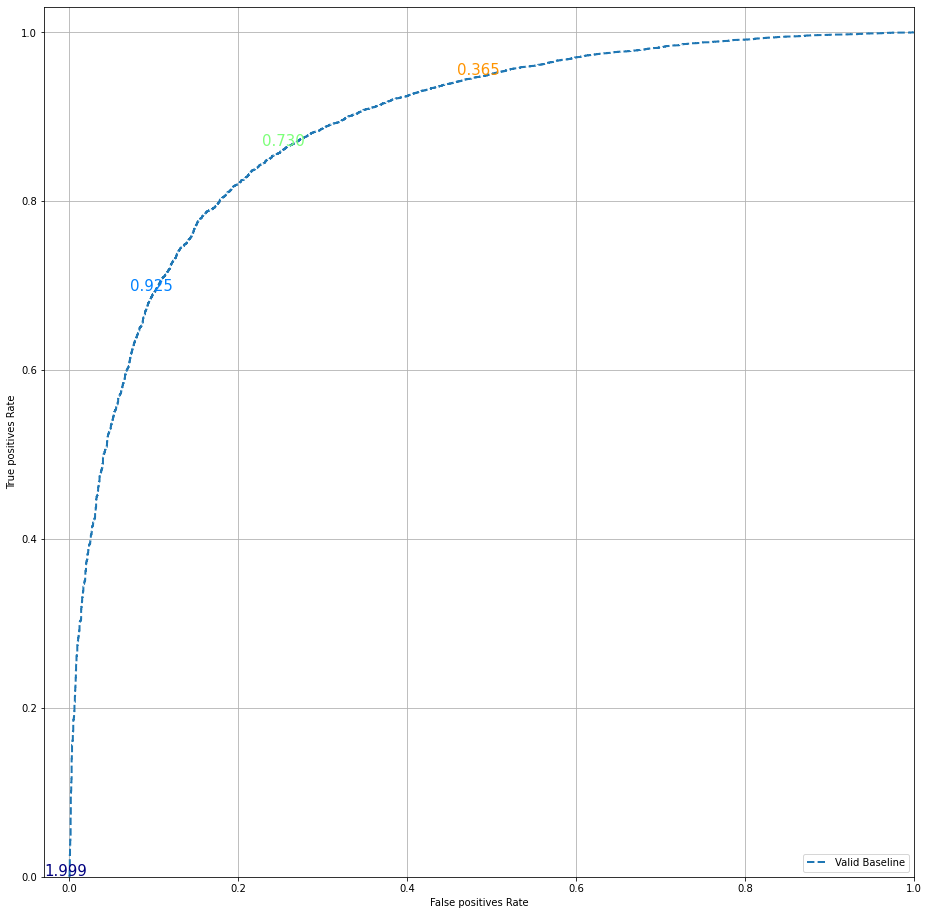

In [18]:
plot_roc("Valid Baseline", valid_labels, valid_predict, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [19]:
new_model = tf.keras.models.load_model('C:\\Users\\vishe\\OneDrive\\Desktop\\Mini_project_final_review\\lstm_out\\tf_lstmmodel.h5')
new_model.summary()

C:\Users\vishe\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            800016    
_________________________________________________________________
dropout (Dropout)            (None, 50, 16)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 50, 16)            2112      
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               410112    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 4

In [20]:
with open('C:\\Users\\vishe\\OneDrive\\Desktop\\Mini_project_final_review\\lstm_out\\tokenizer.json') as json_file:
    json_string = json.load(json_file)
tokenizer1 = tf.keras.preprocessing.text.tokenizer_from_json(json_string)

In [21]:
x_test  = np.array( tokenizer.texts_to_sequences(test_data['clean_review'].tolist()) )
x_test = pad_sequences(x_test, padding='post', maxlen=50)

C:\Users\vishe\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [22]:
# Generate predictions (probabilities -- the output of the last layer)
# on test  data using `predict`
print("Generate predictions for all samples")
predictions = new_model.predict(x_test)

Generate predictions for all samples


In [26]:
test_data['pred_sentiment']= predictions
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment >= 0.730),int(1),test_data.pred_sentiment)
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment < 0.730),int(0),test_data.pred_sentiment)

C:\Users\vishe\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\vishe\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\vishe\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [27]:
test_data['emo_key']=test_labels
test_data

C:\Users\vishe\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,clean_review,emotion,pred_sentiment,emo_key
35000,keeps phone safe. pretty heavy bulky though.,neg,1.0,0
35001,liked phone working well.,pos,0.0,1
35002,"phone problem hotspot, tried hotspot share net...",neg,0.0,0
35003,got part gift promotion bought 9000ah external...,pos,1.0,1
35004,purchased cable google nexus 6p. although phon...,pos,1.0,1
...,...,...,...,...
39995,"far working fine, hopefully last time order ch...",pos,1.0,1
39996,great case money. fits look great.,pos,1.0,1
39997,bad product. worked well 1 month stopped worki...,neg,0.0,0
39998,gets job done. quite thought ordering though.,pos,0.0,1


In [30]:
labels = [0, 1]
print(classification_report(test_data['emo_key'].tolist(),test_data['pred_sentiment'].tolist(),labels=labels))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71      1276
           1       0.91      0.88      0.89      3724

    accuracy                           0.84      5000
   macro avg       0.79      0.81      0.80      5000
weighted avg       0.85      0.84      0.84      5000

